# House predictions with linear regression

In [1]:
import turicreate as tc
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
data = tc.SFrame('Hyderabad.csv')
data

Finished parsing file /Users/luisserrano/Documents/Book/code/manning/Chapter 3 - Linear Regression/Hyderabad.csv

Parsing completed. Parsed 100 lines in 0.0484 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/luisserrano/Documents/Book/code/manning/Chapter 3 - Linear Regression/Hyderabad.csv

Parsing completed. Parsed 2518 lines in 0.022966 secs.

Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens
6968000,1340,Nizampet,2,0,0,1,1,1
29000000,3498,Hitech City,4,0,0,1,1,1
6590000,1318,Manikonda,2,0,0,1,0,0
5739000,1295,Alwal,3,1,0,0,0,0
5679000,1145,Kukatpally,2,0,0,0,0,1
6099000,1230,Nizampet,2,0,0,0,0,0
7000000,1350,Manikonda,2,0,0,0,0,0
4198000,1400,Gachibowli,3,0,0,1,1,0
9900000,2240,Tellapur,3,0,0,1,1,0
9800000,1520,Gachibowli,2,1,0,0,0,0


### Exploring the relationship between price and area

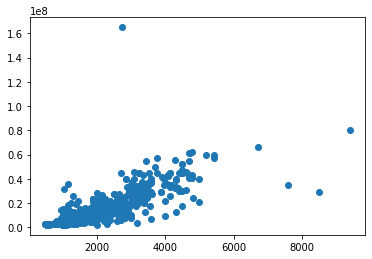

In [3]:
plt.scatter(data['Area'], data['Price'])

In [4]:
simple_model = tc.linear_regression.create(data, features=['Area'], target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.004136     | 144427922.043183   | 30862857.157779      | 4945083.868214                  | 4036154.496671                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [5]:
simple_model.coefficients

name,index,value,stderr
(intercept),None,-6207777.920241812,244661.96482612388
Area,None,9738.129409839525,135.31149551138026


In [6]:
b, m = simple_model.coefficients['value']
print("slope:", m)
print("y-intercept:", b)

slope: 9738.129409839525
y-intercept: -6207777.920241812


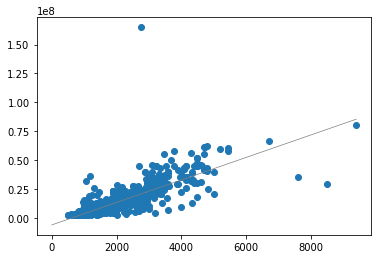

In [7]:
import utils

plt.scatter(data['Area'], data['Price'])
utils.draw_line(m, b, starting=0, ending=max(data['Area']))

### Building a model that uses all the features

In [8]:
model = tc.linear_regression.create(data, target='Price')

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 2392

Number of features          : 39

Number of unpacked features : 39

Number of coefficients    : 275

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.032533     | 140127684.660799   | 20658527.283627      | 4260526.218614                  | 3374622.193417                    |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

In [9]:
model.coefficients

name,index,value,stderr
(intercept),None,-3022752.0911167115,618489.5407731188
Area,None,9125.383164878123,259.2578267091316
Location,Hitech City,5051685.618893023,782144.8483756972
Location,Manikonda,-171898.80916651257,672194.4783349473
Location,Alwal,-553069.4192139495,1194002.3987869197
Location,Kukatpally,1902136.2531289007,663464.9924187552
Location,Gachibowli,4831697.953564234,759291.5657003627
Location,Tellapur,-1143442.253916987,1067171.0896948425
Location,Kokapet,701011.8255273207,820642.0707779091
Location,Hyder Nagar,1748406.0223374756,2081420.2265099068


In [10]:
model.evaluate(data)

{'max_error': 140127684.66079926, 'rmse': 4220617.7981068585}

In [11]:
house = tc.SFrame({'Area': [1000], 'No. of Bedrooms':[3]})
house

Area,No. of Bedrooms
1000,3


In [12]:
model.predict(house)

dtype: float
Rows: 1
[1993817.7244553622]